In [5]:
import sys
import pandas
import pylab as pl
from sklearn import preprocessing
from sklearn.decomposition import PCA

explained variance ratio (first two components): [0.3915801  0.11722456]


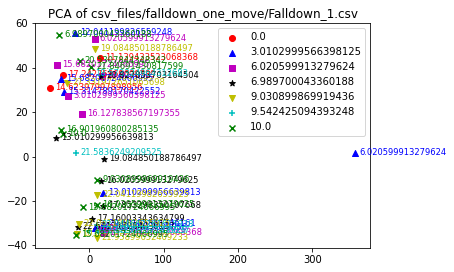

In [14]:

def main():
	"""Load data."""
	try:
		csvfile = "csv_files/falldown_one_move/Falldown_1.csv"
	except IndexError:
		print ('%s\n\nUsage: %s [--3d] <csv_files_one_move/hand_move_up_one_move/hand_move_up_1.csv>' % (__doc__, sys.argv[0]))
		return
	data = pandas.read_csv(csvfile, index_col=(0, 1))

	# first column provides labels
	ylabels = [a for a, _ in data.index]
	labels = [text for _, text in data.index]
	encoder = preprocessing.LabelEncoder().fit(ylabels)

	xdata = data.values
	ydata = encoder.transform(ylabels)
	target_names = encoder.classes_
	plotpca(xdata, ydata, target_names, labels, csvfile)


def plotpca(xdata, ydata, target_names, items, filename):
	"""Make plot."""
	pca = PCA(n_components=2)
	components = pca.fit(xdata).transform(xdata)

	# Percentage of variance explained for each components
	print('explained variance ratio (first two components):',
			pca.explained_variance_ratio_)

	pl.figure()  # Make a plotting figure
	pl.subplots_adjust(bottom=0.1)

	# NB: a maximum of 7 targets will be plotted
	for i, (c, m, target_name) in enumerate(zip(
			'rbmkycg', 'o^s*v+x', target_names)):
		pl.scatter(components[ydata == i, 0], components[ydata == i, 1],
				color=c, marker=m, label=target_name)
		for n, x, y in zip(
				(ydata == i).nonzero()[0],
				components[ydata == i, 0],
				components[ydata == i, 1]):
			pl.annotate(
					items[n],
					xy=(x, y),
					xytext=(5, 5),
					textcoords='offset points',
					color=c,
					fontsize='small',
					ha='left',
					va='top')
	pl.legend()
	pl.title('PCA of %s' % filename)
	pl.show()


if __name__ == '__main__':
	main()